# Image Enhancement in the Spatial Domain

In this unit, we will review various filters that help enhance images. We will focus on different types of filters and their effects on images.

For image processing, we will follow the procedure outlined below:

- **Preprocessing**: Preparing the image for further processing.
- **Processing**: The stage where the image undergoes morphological changes.
- **Post-processing**: Applying additional tools to the image based on its application.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
image = cv2.imread('images\\ruido.jpg',cv2.IMREAD_GRAYSCALE)

#function to normalize images to convert
def normalize_image(image):
 
    image = np.clip(image, 0, 255)
    image = (255 * (image - np.min(image)) / (np.max(image) - np.min(image))).astype(np.uint8)
    return image

**Resolution of the image**
With the following code you can actually know the resolution of the image you are working with.

In [4]:
# Convert the image to a NumPy array if needed
image_array = np.array(image)
spllited=[]
# Get the dimensions of the image
height, width = image_array.shape[:2]
for res in image_array.shape[:2]:
    spllited.append(res//2)
print(f"Splitted: {spllited[1]}x{spllited[0]}")

# Print the resolution
print(f"Resolution: {width}x{height}")

Splitted: 320x202
Resolution: 640x404


**Band Pass Filter**

A band pass filter allows frequencies within a certain range to pass through and attenuates frequencies outside that range.

In [5]:
def band_pass_filter(image, low_freq, high_freq):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    mask = np.zeros((rows, cols), np.uint8)
    
    mask[crow-low_freq:crow+low_freq, ccol-low_freq:ccol+low_freq] = 1
    mask[crow-high_freq:crow+high_freq, ccol-high_freq:ccol+high_freq] = 0
    
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

low_freq = 35
high_freq = 350
band_pass_image = band_pass_filter(image, low_freq, high_freq)


**Butterworth Filter**

A Butterworth filter is a type of signal processing filter designed to have a flat frequency response.

In [6]:

def butterworth_filter(image, cutoff, order):
    # Get the image dimensions
    rows, cols = image.shape

    # Create a meshgrid of coordinates (centered)
    crow, ccol = rows // 2, cols // 2
    u = np.arange(-crow, crow)
    v = np.arange(-ccol, ccol)
    u, v = np.meshgrid(u, v)

    # Compute the distance from the center of the frequency plane
    D = np.sqrt((u**2) + (v**2))

    # Compute the Butterworth filter
    H = 1 / (1 + (D / cutoff)**(2 * order))

    # Apply the filter to the shifted DFT of the image
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Ensure the filter H has the same shape as dft_shift
    if H.shape != dft_shift.shape:
        # Resize H to match the shape of dft_shift
        H = np.resize(H, dft_shift.shape)

    fshift = dft_shift * H

    # Transform back to the spatial domain
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

# Apply the Butterworth filter
cutoff = 200
order = 2
butterworth_image = butterworth_filter(image, cutoff, order)
butterworth_image=normalize_image(butterworth_image)


**Gaussian Filter**

A Gaussian filter is a low-pass filter that smooths the image by reducing high-frequency noise.

In [7]:
def gaussian_filter(image, sigma):
    # Aplicar el filtro Gaussiano en el dominio espacial para simplicidad
    filtered_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return filtered_image


sigma=3
gaussian_image = gaussian_filter(image, sigma)


**High Pass Filter**

A high pass filter allows high-frequency components to pass through and attenuates low-frequency components.

In [8]:
def high_pass_filter(image, cutoff):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 - np.exp(-(D**2) / (2 * cutoff**2))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    # comparedft_shift with the mask filter
    if H.shape != dft_shift.shape:
        H = np.resize(H,dft_shift.shape)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

cutoff = 10
high_pass_image = high_pass_filter(image, cutoff)



**Butterworth High Pass Filter**

A Butterworth high pass filter is designed to allow high-frequency components to pass while attenuating low-frequency components.

In [9]:
def butterworth_high_pass_filter(image, cutoff, order):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 / (1 + (cutoff / D)**(2 * order))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # compare dft_shift with the mask filter
    if H.shape != dft_shift.shape:
        H = np.resize(H,dft_shift.shape)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

cutoff = 30
order = 2
butterworth_high_pass_image = butterworth_high_pass_filter(image, cutoff, order)

C:\Users\Jose Luis Gonzalez\AppData\Local\Temp\ipykernel_19740\2167678817.py:10: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


**Gaussian High Pass Filter**

A Gaussian high pass filter is designed to allow high-frequency components to pass while attenuating low-frequency components.

In [45]:
def gaussian_high_pass_filter(image, gaussian_image, sigma):
    gaussian_image = gaussian_filter(image, sigma)
    # Normalize images to the range [0, 255]
    low_pass_filtered_image = cv2.normalize(gaussian_image, None, 0, 255, cv2.NORM_MINMAX)
    original_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Subtract the low-pass filtered image from the original image to get high-pass filter
    
    gaussian_high_pass_image = original_image - low_pass_filtered_image
    
    # Ensure pixel values are within [0, 255] after subtraction
    #gaussian_high_pass_image = np.clip(gaussian_high_pass_image, 0, 255).astype(np.uint8)
    
    return gaussian_high_pass_image
sigma=3
gaussian_high_pass_image=gaussian_high_pass_filter(image, gaussian_image,sigma)


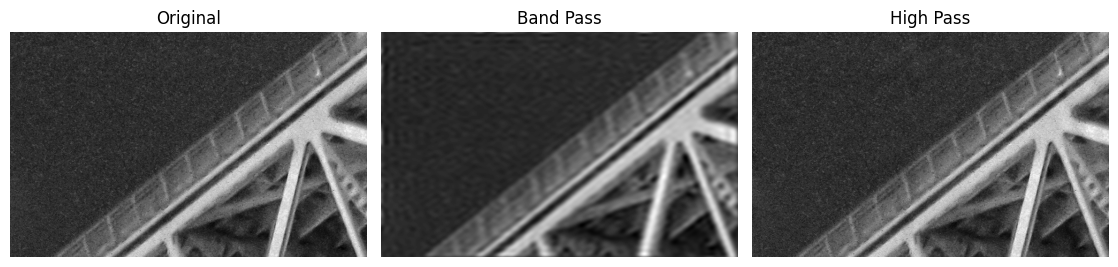

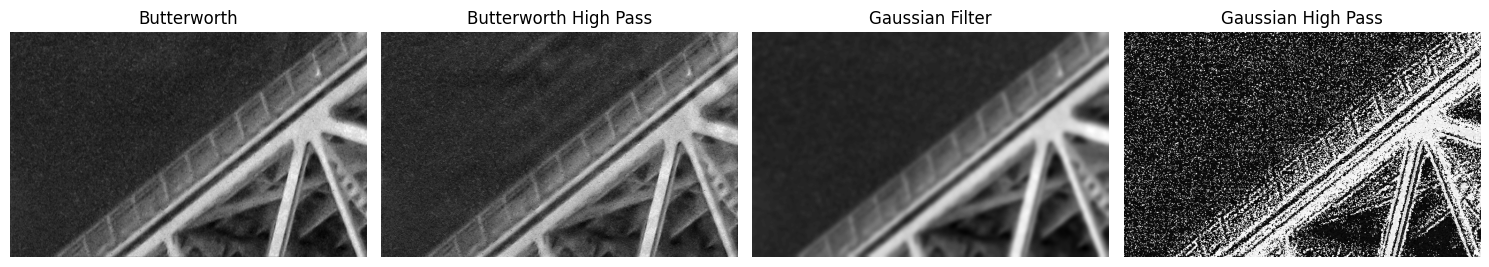

In [46]:
images = {
    'Original': image,
    'Band Pass': band_pass_image,
    'High Pass': high_pass_image,
    
}

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(images.items(), 1):
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

images = {

    'Butterworth': butterworth_image,
    'Butterworth High Pass': butterworth_high_pass_image,
    'Gaussian Filter': gaussian_image,
    'Gaussian High Pass': gaussian_high_pass_image,
    
}

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(images.items(), 1):
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

